In [154]:
#import packages
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#Load Data
company = 'AMZN'

#Gather stock date of the past five years
start = dt.datetime(2016,1,1)
end = dt.datetime(2021,1,31)

#These date form YAHOO
df = web.DataReader(company, 'yahoo', start, end)

df.reset_index(inplace=True,drop=False)

#print the head
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-12-31,687.750000,675.890015,686.080017,675.890015,3749600,675.890015
1,2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990
2,2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978
3,2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024
4,2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002


In [155]:
from fastai.tabular import add_datepart

In [156]:
print(df.index)

RangeIndex(start=0, stop=1279, step=1)


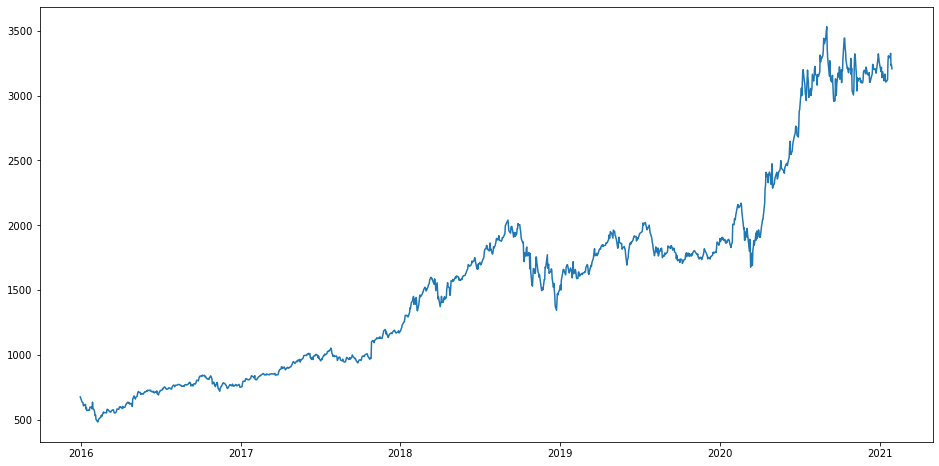

In [157]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [158]:
#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [159]:
#create features
add_datepart(new_data, 'Date')
#elapsed will be the time stamp
new_data.drop('Elapsed', axis=1, inplace=True)

In [160]:
#split into train and validation
train = new_data[:1249]
valid = new_data[1249:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [161]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [162]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [163]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

1813.8813123737345

/Users/kejingli/opt/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kejingli/opt/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


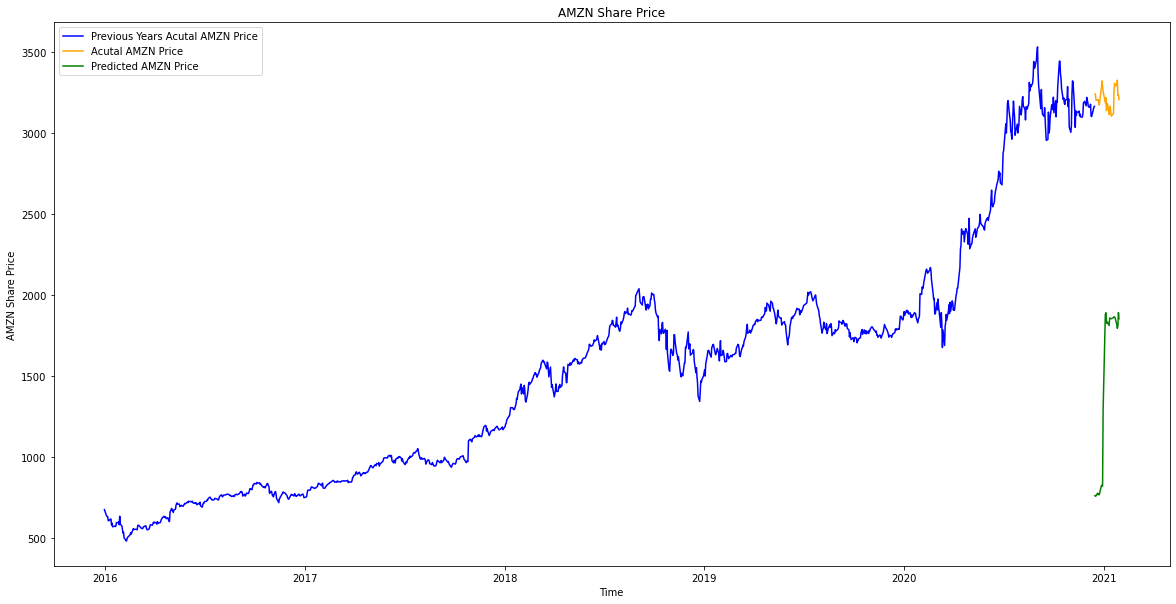

In [164]:
#plot
#valid.loc[:, 'Predictions'] = 0
valid.loc[:, 'Predictions'] = preds
n = train.loc[:, 'Close']
m = valid.loc[:, 'Close']
h = valid.loc[:, 'Predictions']
new_df = df[:1249]
new_pf = df[1249:]
n.index = new_df['Date']
m.index = new_pf['Date']
h.index = new_pf['Date']
plt.plot(n, color='blue', label=f"Previous Years Acutal {company} Price")
plt.plot(m, color="orange", label=f"Acutal {company} Price")
plt.plot(h, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()

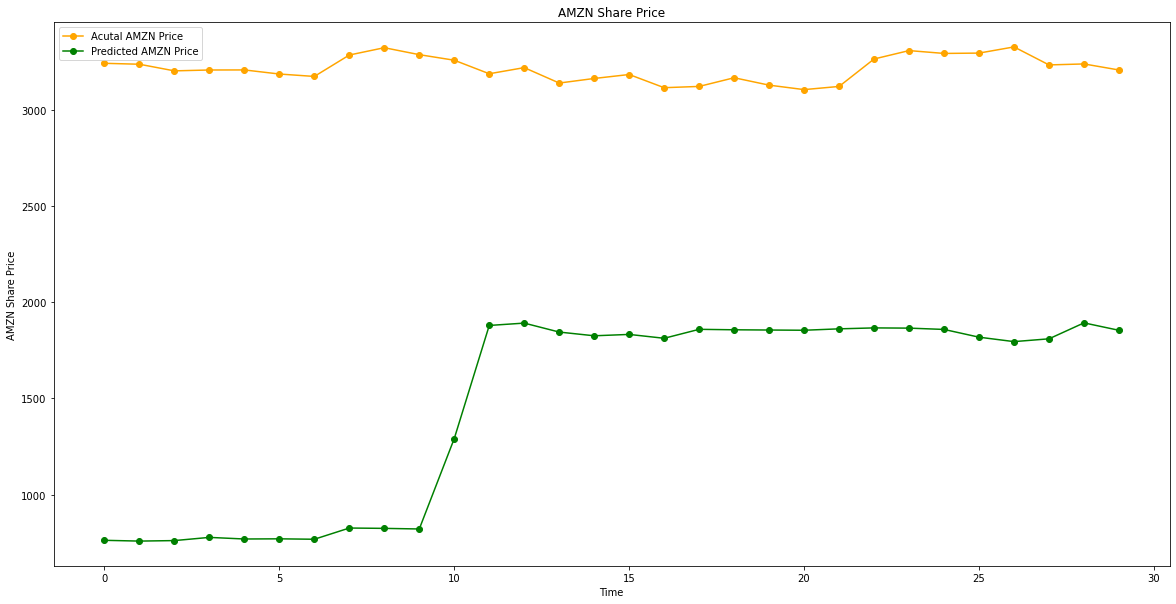

In [165]:
year = valid.loc[:, 'Day']
ap = valid.loc[:, 'Close']
pp = valid.loc[:, 'Predictions']
ap = np.array(ap)
pp = np.array(pp)
year = np.array(year)
plt.plot(ap, '-o', color="orange", label=f"Acutal {company} Price")
plt.plot(pp, '-o', color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()